In [1]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/MyDrive/DSF \PROJECT/

In [2]:
%ls

ARIMA2_80.csv               POPDEN.csv
ARIMA_80.csv                README.md
CSV_80.csv                  Unemployment.xlsx
Covid_state_analysis.ipynb  covid.csv
DSF DATA notes.docx         covid.xlsx
DSF DATA.ipynb              politics.csv
Education.xlsx              politics_1.xlsx
LICENSE


Sodapy is used to collect data directly from CDC website through api

In [3]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


##HESITANCY AND ALL

https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw/data

In [7]:
# import pandas as pd
#%cd drive/MyDrive/DSF\ PROJECT
# usecol= ['FIPS Code', 'County Name', 'State', 'Estimated hesitant or unsure', 'Estimated strongly hesitant', 'Social Vulnerability Index (SVI)', 'Percent Hispanic', 'Percent non-Hispanic American Indian/Alaska Native', 'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 'Percent non-Hispanic Native Hawaiian/Pacific Islander', 'Percent non-Hispanic White']
# dfmain = pd.read_csv('HESITANCY_SVI_RACE.csv', usecols= usecol)
# mapper={'FIPS Code':"FIPS", 'County Name':"County", 'State':"State", 'Estimated hesitant or unsure':"HESITANT_UNS", 'Estimated strongly hesitant':"HESITANT_S", 'Social Vulnerability Index (SVI)':"SVI", 'Percent Hispanic':"Hispanic", 'Percent non-Hispanic American Indian/Alaska Native':"AIAN", 'Percent non-Hispanic Asian':"Asian", 'Percent non-Hispanic Black':"Black", 'Percent non-Hispanic Native Hawaiian/Pacific Islander':"NHPI", 'Percent non-Hispanic White':"White"}
# dfmain.rename(mapper, inplace =True, axis=1)

#static Data

In [8]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("q9mh-h2tw", limit=2000000)

# Convert to pandas DataFrame
res = pd.DataFrame.from_records(results)
#Dynamic Data

The data contains information about Race hesitancy(%), overall hesitancy(%), FIPS, County name, State name.

In [9]:
dfmain = res[['fips_code','county_name','state','estimated_hesitant_or_unsure', 'estimated_strongly_hesitant',
       'social_vulnerability_index','percent_hispanic', 'percent_non_hispanic_american',
       'percent_non_hispanic_asian', 'percent_non_hispanic_black',
       'percent_non_hispanic_native', 'percent_non_hispanic_white']]
mapper={'fips_code':"FIPS", 'county Name':"County", 'state':"State", 'estimated_hesitant_or_unsure':"HESITANT_UNS", 'estimated_strongly_hesitant':"HESITANT_S", 'social_vulnerability_index':"SVI",
        'percent_hispanic':"Hispanic", 'percent_non_hispanic_american':"AIAN", 'percent_non_hispanic_asian':"Asian", 'percent_non_hispanic_black':"Black", 'percent_non_hispanic_native':"NHPI",
        'percent_non_hispanic_white':"White"}
dfmain.rename(mapper, inplace =True, axis=1)

/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
dfmain.shape

(3142, 12)

In [11]:
dfmain

,FIPS,county_name,State,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,NHPI,White
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,0,0.6887
1,1121,"Talladega County, Alabama",ALABAMA,0.235,0.1368,0.87,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263
2,1131,"Wilcox County, Alabama",ALABAMA,0.2357,0.1337,0.93,0.0053,0.0009,0.0003,0.6938,0,0.2684
3,1129,"Washington County, Alabama",ALABAMA,0.2357,0.1337,0.73,0.0146,0.0731,0.0025,0.2354,0,0.6495
4,1133,"Winston County, Alabama",ALABAMA,0.2313,0.1379,0.7,0.0315,0.0034,0.0016,0.0073,0.0005,0.937
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55079,"Milwaukee County, Wisconsin",WISCONSIN,0.2144,0.088,0.81,0.15,0.0047,0.0428,0.2606,0.0002,0.5124
3138,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.2126,0.0959,0.28,0.084,0.0034,0.0043,0.0051,0,0.8953
3139,56001,"Albany County, Wyoming",WYOMING,0.2673,0.1405,0.25,0.0953,0.0091,0.0327,0.015,0.0003,0.8248
3140,55067,"Langlade County, Wisconsin",WISCONSIN,0.2007,0.0906,0.35,0.0197,0.0069,0.0022,0.0125,0.0002,0.9383


##POPULATION DENSITY

In [12]:
#static Data
popcol= ['GEOID', 'NAME', 'State', 'B01001_calc_PopDensity']
popden = pd.read_csv('POPDEN.csv', usecols = popcol)
mapperpop = {'GEOID':"FIPS", 'NAME':"County", 'State':"State", 'B01001_calc_PopDensity':"POPDEN"}
popden.rename(mapperpop, inplace=True, axis=1)

In [13]:
popden['FIPS'] = popden['FIPS'].apply(lambda x: int(x))

In [14]:
type(popden['FIPS'].loc[1])

numpy.int64

In [15]:
popden.shape

(3220, 4)

####UNEMPLOYMENT

In [16]:
unempcol = ['LAUS', 'County', 'Unemp_rate']
unemp= pd.read_excel('Unemployment.xlsx', usecols=unempcol)
unemp.rename({'LAUS':'FIPS'}, inplace=True, axis=1)
unemp['FIPS'] = unemp['FIPS'].apply(lambda x : int(x[2:7]))

In [17]:
unemp['FIPS'].value_counts().sum()

3219

In [18]:
unemp['FIPS'][0]

1001

In [19]:
unemp.shape

(3219, 3)

##EDUCATION

Contains education level details for each county. Seperated in 4 bins.
LHSD - Less than High school or Diploma
HSD - High School or Diploma
CAD - College or Associate Degree
BDH - Bachelors Degree or Higher

All data is in percentage.

In [20]:
edcols=['FIPS','State','County','B','LHSD',	'HSD',	'CAD',	'BDH']
ed=pd.read_excel('Education.xlsx', usecols=edcols)
ed

,FIPS,State,County,B,LHSD,HSD,CAD,BDH
0,0,US,United States,NaN,11.998918,26.956844,28.898697,32.145542
1,1000,AL,Alabama,NaN,13.819302,30.800268,29.912098,25.468332
2,1001,AL,Autauga County,2.0,11.483395,33.588459,28.356571,26.571573
3,1003,AL,Baldwin County,4.0,9.193843,27.659616,31.284081,31.862459
4,1005,AL,Barbour County,6.0,26.786907,35.604542,26.029837,11.578713
...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,1.0,28.428238,26.225822,24.123638,21.222300
3279,72147,PR,Vieques Municipio,7.0,28.773281,39.177906,14.049454,17.999357
3280,72149,PR,Villalba Municipio,2.0,21.993263,38.366028,19.727892,19.912819
3281,72151,PR,Yabucoa Municipio,1.0,29.048897,25.715004,27.233078,18.003019


In [21]:
ed.dropna(subset= ['B'],axis=0, inplace=True)

In [22]:
ed

,FIPS,State,County,B,LHSD,HSD,CAD,BDH
2,1001,AL,Autauga County,2.0,11.483395,33.588459,28.356571,26.571573
3,1003,AL,Baldwin County,4.0,9.193843,27.659616,31.284081,31.862459
4,1005,AL,Barbour County,6.0,26.786907,35.604542,26.029837,11.578713
5,1007,AL,Bibb County,1.0,20.942602,44.878773,23.800098,10.378526
6,1009,AL,Blount County,1.0,19.509438,33.422131,33.975021,13.093413
...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,1.0,28.428238,26.225822,24.123638,21.222300
3279,72147,PR,Vieques Municipio,7.0,28.773281,39.177906,14.049454,17.999357
3280,72149,PR,Villalba Municipio,2.0,21.993263,38.366028,19.727892,19.912819
3281,72151,PR,Yabucoa Municipio,1.0,29.048897,25.715004,27.233078,18.003019


In [23]:
ed["FIPS"].value_counts().sum()

3221

##VACCINATION

This data contains information about county level vaccination for both single and both doses(in percentage) and Metro status of that county. It is a time-series data beginning around 1st JAN 2021 till latest date.

https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh

In [24]:
#DYNAMIC DATA

#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

results = client.get("8xkx-amqh", limit=200000000)
vacols= ['FIPS','Date','Recip_County', 'Recip_State', 'Series_Complete_Pop_Pct','Administered_Dose1_Pop_Pct', 'Metro_status']
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
vac = results_df[['fips','date','recip_county', 'recip_state', 'series_complete_pop_pct','administered_dose1_pop_pct', 'metro_status']]
vac.rename({'fips':'FIPS','date':'Date','recip_county':'Recip_County', 'recip_state': 'Recip_State', 'series_complete_pop_pct':'Series_Complete_Pop_Pct','administered_dose1_pop_pct':'Administered_Dose1_Pop_Pct', 'metro_status': 'Metro_status'}, inplace =True, axis = 1)

/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
vac['Date']=vac['Date'].apply(lambda x: x[:10])

/var/folders/6f/wrlgw0cs2zl31x120hx18c3c0000gn/T/ipykernel_60192/1849364994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['Date']=vac['Date'].apply(lambda x: x[:10])


In [26]:
vac[vac['Date']=='2021-11-04']

,FIPS,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
206829,48501,2021-11-04,Yoakum County,TX,36.4,42.2,Non-metro
206830,28065,2021-11-04,Jefferson Davis County,MS,40,44.6,Non-metro
206831,27025,2021-11-04,Chisago County,MN,51.4,54.7,Metro
206832,34017,2021-11-04,Hudson County,NJ,67.1,78.3,Metro
206833,05139,2021-11-04,Union County,AR,42.9,53.7,Non-metro
...,...,...,...,...,...,...,...
210107,41061,2021-11-04,Union County,OR,44.6,48.7,Non-metro
210108,53073,2021-11-04,Whatcom County,WA,64.9,70.5,Metro
210109,37133,2021-11-04,Onslow County,NC,52.8,62.6,Metro
210110,12085,2021-11-04,Martin County,FL,58.3,67.6,Metro


In [27]:
vac['Date'][0]

'2022-01-06'

In [28]:
type(vac['Date'].loc(0))

pandas.core.indexing._LocIndexer

##POLITICS

Political Data 

In [29]:
polcol=['year','State','state_po','County','FIPS','party','candidatevotes','totalvotes']
pol = pd.read_csv('politics.csv', usecols=polcol)
pol

,year,State,state_po,County,FIPS,party,candidatevotes,totalvotes
0,2000,ALABAMA,AL,AUTAUGA,1001.0,DEMOCRAT,4942.0,17208.0
1,2000,ALABAMA,AL,AUTAUGA,1001.0,REPUBLICAN,11993.0,17208.0
2,2000,ALABAMA,AL,AUTAUGA,1001.0,GREEN,160.0,17208.0
3,2000,ALABAMA,AL,AUTAUGA,1001.0,OTHER,113.0,17208.0
4,2000,ALABAMA,AL,BALDWIN,1003.0,DEMOCRAT,13997.0,56480.0
...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,REPUBLICAN,3245.0,4032.0
72613,2020,WYOMING,WY,WESTON,56045.0,DEMOCRAT,360.0,3560.0
72614,2020,WYOMING,WY,WESTON,56045.0,LIBERTARIAN,46.0,3560.0
72615,2020,WYOMING,WY,WESTON,56045.0,OTHER,47.0,3560.0


In [30]:
pol2020 = pol[pol['year']==2020]
pparty = pd.DataFrame()

In [31]:
pol2020[(pol2020['year']==2020) & (pol2020['party']=='DEMOCRAT')]['FIPS'].value_counts()

45039.0    6
45059.0    6
45043.0    6
45045.0    6
45047.0    6
          ..
26115.0    1
26117.0    1
26119.0    1
26121.0    1
56045.0    1
Name: FIPS, Length: 3153, dtype: int64

In [32]:
A = pol2020.groupby(['FIPS','party'])['candidatevotes'].sum()

In [33]:
a=pd.DataFrame(A)

In [34]:
a.reset_index(inplace = True)

In [35]:
a

,FIPS,party,candidatevotes
0,1001.0,DEMOCRAT,7503.0
1,1001.0,OTHER,429.0
2,1001.0,REPUBLICAN,19838.0
3,1003.0,DEMOCRAT,24578.0
4,1003.0,OTHER,1557.0
...,...,...,...
13642,56043.0,REPUBLICAN,3245.0
13643,56045.0,DEMOCRAT,360.0
13644,56045.0,LIBERTARIAN,46.0
13645,56045.0,OTHER,47.0


In [36]:
pparty['REPUBLICAN'] = a[a['party']=='REPUBLICAN']['candidatevotes'].values
pparty['DEMOCRAT'] = a[a['party']=='DEMOCRAT']['candidatevotes'].values

In [37]:
pparty['FIPS'] = pd.Series(a['FIPS'].unique())

In [38]:
OTHER = pol2020[pol2020['party']=='OTHER'][['FIPS','candidatevotes']]
LIBERTARIAN = pol2020[pol2020['party']=='LIBERTARIAN'][['FIPS','candidatevotes']]
GREEN = pol2020[pol2020['party']=='GREEN'][['FIPS','candidatevotes']]

In [39]:
pparty = pparty.merge(OTHER, on ='FIPS', how = 'left')
pparty = pparty.merge(GREEN, on ='FIPS', how = 'left', suffixes=('other','green'))
pparty = pparty.merge(LIBERTARIAN, on ='FIPS', how = 'left', suffixes=('','lib'))


In [40]:
pparty.rename({'candidatevotesother':'OTHER','candidatevotesgreen':'GREEN','candidatevotes':'LIBERTARIAN'}, inplace=True, axis = 1)

In [41]:
pparty

,REPUBLICAN,DEMOCRAT,FIPS,OTHER,GREEN,LIBERTARIAN
0,19838.0,7503.0,1001.0,429.0,NaN,NaN
1,83544.0,24578.0,1003.0,1557.0,NaN,NaN
2,5622.0,4816.0,1005.0,80.0,NaN,NaN
3,7525.0,1986.0,1007.0,84.0,NaN,NaN
4,24711.0,2640.0,1009.0,237.0,NaN,NaN
...,...,...,...,...,...,...
32064,12229.0,3823.0,56037.0,296.0,NaN,350.0
32065,4341.0,9848.0,56039.0,343.0,NaN,255.0
32066,7496.0,1591.0,56041.0,200.0,NaN,172.0
32067,3245.0,651.0,56043.0,71.0,NaN,65.0


In [42]:
pparty =pparty.groupby('FIPS')[['REPUBLICAN','DEMOCRAT', 'OTHER', "LIBERTARIAN", 'GREEN']].sum()

In [43]:
pparty = pd.DataFrame(pparty)

In [44]:
pparty.reset_index(inplace=True)

In [45]:
pparty['Total']= pparty['DEMOCRAT']+pparty['REPUBLICAN']+pparty['OTHER']+pparty['LIBERTARIAN']+pparty['GREEN']

In [46]:
pparty

,FIPS,REPUBLICAN,DEMOCRAT,OTHER,LIBERTARIAN,GREEN,Total
0,1001.0,19838.0,7503.0,429.0,0.0,0.0,27770.0
1,1003.0,83544.0,24578.0,1557.0,0.0,0.0,109679.0
2,1005.0,5622.0,4816.0,80.0,0.0,0.0,10518.0
3,1007.0,7525.0,1986.0,84.0,0.0,0.0,9595.0
4,1009.0,24711.0,2640.0,237.0,0.0,0.0,27588.0
...,...,...,...,...,...,...,...
3148,56037.0,12229.0,3823.0,296.0,350.0,0.0,16698.0
3149,56039.0,4341.0,9848.0,343.0,255.0,0.0,14787.0
3150,56041.0,7496.0,1591.0,200.0,172.0,0.0,9459.0
3151,56043.0,3245.0,651.0,71.0,65.0,0.0,4032.0


In [47]:
pparty.isna().sum()

FIPS           0
REPUBLICAN     0
DEMOCRAT       0
OTHER          0
LIBERTARIAN    0
GREEN          0
Total          0
dtype: int64

##MAIN DATA

In [48]:
main = pd.DataFrame()

In [49]:
dfmain['FIPS'] = dfmain['FIPS'].apply(lambda x: int(x))
main = dfmain.merge(popden, on = 'FIPS', how = 'left')

/var/folders/6f/wrlgw0cs2zl31x120hx18c3c0000gn/T/ipykernel_60192/2435801025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmain['FIPS'] = dfmain['FIPS'].apply(lambda x: int(x))


In [50]:
main = main.merge(unemp, on = 'FIPS', how = 'left')
main['Unemp_rate']=main['Unemp_rate'].fillna(0)

In [51]:
main = main.merge(pparty, on = 'FIPS', how = 'left')

In [52]:
main = main.merge(ed, on = 'FIPS', how = 'left')
main.drop('B', axis=1, inplace=True)

In [53]:
vac.drop(vac.loc[vac['FIPS']=='UNK'].index, inplace=True)
vac['FIPS']=vac['FIPS'].apply(lambda x: int(x))
vac['Administered_Dose1_Pop_Pct']=vac['Administered_Dose1_Pop_Pct'].apply(lambda x: float(x))
vac['Series_Complete_Pop_Pct']=vac['Series_Complete_Pop_Pct'].apply(lambda x: float(x))
vaclatest = vac[vac['Date']==vac['Date'].max()]

/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/6f/wrlgw0cs2zl31x120hx18c3c0000gn/T/ipykernel_60192/4197181341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['FIPS']=vac['FIPS'].apply(lambda x: int(x))
/var/folders/6f/wrlgw0cs2zl31x120hx18c3c0000gn/T/ipykernel_60192/4197181341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [54]:
main = main.merge(vaclatest, on ='FIPS', how = 'left')

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
main['Metro_status']=main['Metro_status'].fillna('Non-metro')
main['Metro_status'] = encoder.fit_transform(main['Metro_status'])

In [56]:
main

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,LHSD,HSD,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1
1,1121,"Talladega County, Alabama",ALABAMA,0.235,0.1368,0.87,0.0229,0.0043,0.0061,0.3237,...,19.670317,33.720287,31.648600,14.960798,2022-01-06,Talladega County,AL,35.1,42.9,1
2,1131,"Wilcox County, Alabama",ALABAMA,0.2357,0.1337,0.93,0.0053,0.0009,0.0003,0.6938,...,23.545122,39.471466,24.486927,12.496486,2022-01-06,Wilcox County,AL,50.4,64.3,1
3,1129,"Washington County, Alabama",ALABAMA,0.2357,0.1337,0.73,0.0146,0.0731,0.0025,0.2354,...,17.371761,43.063633,26.899347,12.665257,2022-01-06,Washington County,AL,44.1,53.6,1
4,1133,"Winston County, Alabama",ALABAMA,0.2313,0.1379,0.7,0.0315,0.0034,0.0016,0.0073,...,21.187923,38.214035,27.768711,12.829330,2022-01-06,Winston County,AL,21.2,25.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55079,"Milwaukee County, Wisconsin",WISCONSIN,0.2144,0.088,0.81,0.15,0.0047,0.0428,0.2606,...,11.713523,28.367804,28.952116,30.966558,2022-01-06,Milwaukee County,WI,60.4,67.6,0
3138,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.2126,0.0959,0.28,0.084,0.0034,0.0043,0.0051,...,9.327148,39.044342,32.350742,19.277769,2022-01-06,Trempealeau County,WI,63.3,67.9,1
3139,56001,"Albany County, Wyoming",WYOMING,0.2673,0.1405,0.25,0.0953,0.0091,0.0327,0.015,...,4.050845,14.685477,29.496672,51.767006,2022-01-06,Albany County,WY,51.9,59.5,1
3140,55067,"Langlade County, Wisconsin",WISCONSIN,0.2007,0.0906,0.35,0.0197,0.0069,0.0022,0.0125,...,9.747293,42.337368,31.259291,16.656048,2022-01-06,Langlade County,WI,52.0,54.9,1


In [57]:
per =  pd.DataFrame()

In [58]:
main['REPUBLICAN']=per['R'] = main['REPUBLICAN']/main['Total']
main['DEMOCRAT'] = per['D'] = main['DEMOCRAT']/main['Total']
main['GREEN'] = per['G'] = main['GREEN']/main['Total']
main['OTHER'] = per['O'] = main['OTHER']/main['Total']
main['LIBERTARIAN'] = per['L'] = main['LIBERTARIAN']/main['Total']
per['d1'] = main['Series_Complete_Pop_Pct']
per['all'] = main['Administered_Dose1_Pop_Pct']

In [59]:
main.to_csv('covid.csv',index=False)

In [60]:
corr = main.corr()
corr

,FIPS,POPDEN,Unemp_rate,REPUBLICAN,DEMOCRAT,OTHER,LIBERTARIAN,GREEN,Total,LHSD,HSD,CAD,BDH,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
FIPS,1.000000,0.023760,0.024134,0.055873,-0.057490,-0.018140,0.046704,-0.030448,0.028903,-0.003280,-0.000763,-0.056284,0.033355,0.077228,0.082014,-0.001039
POPDEN,0.023760,1.000000,0.123176,-0.257618,0.259886,0.042078,-0.053225,0.077719,0.054145,-0.014865,-0.188113,-0.163282,0.240708,0.146467,0.151456,-0.164805
Unemp_rate,0.024134,0.123176,1.000000,-0.403230,0.407672,0.086521,-0.159411,0.287900,0.000567,0.234680,0.068069,-0.209834,-0.090678,0.221302,0.280699,-0.109063
REPUBLICAN,0.055873,-0.257618,-0.403230,1.000000,-0.998359,-0.183989,-0.000692,-0.341818,-0.161073,0.136629,0.485730,0.152720,-0.539487,-0.534223,-0.537158,0.344231
DEMOCRAT,-0.057490,0.259886,0.407672,-0.998359,1.000000,0.152666,-0.044085,0.320857,0.171879,-0.117262,-0.477261,-0.168138,0.528798,0.522093,0.529890,-0.344872
OTHER,-0.018140,0.042078,0.086521,-0.183989,0.152666,1.000000,-0.057688,0.159399,-0.067816,-0.068534,-0.078931,0.014598,0.096557,0.140618,0.143417,-0.037728
LIBERTARIAN,0.046704,-0.053225,-0.159411,-0.000692,-0.044085,-0.057688,1.000000,0.165779,-0.149271,-0.386883,-0.161460,0.294488,0.215046,0.182226,0.077648,0.001784
GREEN,-0.030448,0.077719,0.287900,-0.341818,0.320857,0.159399,0.165779,1.000000,-0.043002,-0.075094,-0.237720,0.038861,0.207589,0.333644,0.312125,-0.094695
Total,0.028903,0.054145,0.000567,-0.161073,0.171879,-0.067816,-0.149271,-0.043002,1.000000,-0.045322,-0.169449,-0.039507,0.179174,0.117555,0.140167,-0.163500
LHSD,-0.003280,-0.014865,0.234680,0.136629,-0.117262,-0.068534,-0.386883,-0.075094,-0.045322,1.000000,0.255891,-0.462048,-0.595757,-0.278331,-0.171265,0.195900


In [61]:
main[main['FIPS']==36061]
#checking metro status

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,LHSD,HSD,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
2049,36061,"New York County, New York",NEW YORK,0.0894,0.0313,0.55,0.2583,0.0012,0.1205,0.1247,...,12.724144,12.422151,13.538717,61.314987,2022-01-06,New York County,NY,81.1,95.0,0


In [62]:
main[main['Series_Complete_Pop_Pct']>=80]

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,LHSD,HSD,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
86,30087,"Rosebud County, Montana",MONTANA,0.3131,0.1799,0.61,0.0517,0.3686,0.0104,0.0017,...,10.001737,30.682409,41.500259,17.815594,2022-01-06,Rosebud County,MT,80.8,95.0,1
178,48323,"Maverick County, Texas",TEXAS,0.1724,0.0705,0.97,0.9518,0.012,0.0055,0.0032,...,40.499390,22.633984,24.171741,12.694884,2022-01-06,Maverick County,TX,82.0,95.0,1
188,48377,"Presidio County, Texas",TEXAS,0.1765,0.0789,1,0.8374,0.0195,0.0135,0,...,46.588074,15.892088,16.345499,21.174337,2022-01-06,Presidio County,TX,95.0,95.0,1
204,48479,"Webb County, Texas",TEXAS,0.1663,0.0674,0.95,0.9547,0.0004,0.0048,0.0029,...,32.438343,25.304644,23.324125,18.932886,2022-01-06,Webb County,TX,80.8,95.0,0
304,4001,"Apache County, Arizona",ARIZONA,0.3197,0.1586,0.99,0.0634,0.7311,0.0034,0.0052,...,19.597767,32.238758,35.862865,12.300608,2022-01-06,Apache County,AZ,89.6,95.0,1
324,2060,"Bristol Bay Borough, Alaska",ALASKA,0.2884,0.1704,0.35,0.0366,0.3417,0.0023,0.0057,...,5.984252,37.007874,34.488190,22.519686,2022-01-06,Bristol Bay Borough,AK,95.0,95.0,1
339,4023,"Santa Cruz County, Arizona",ARIZONA,0.223,0.1076,0.93,0.8346,0.0022,0.0083,0.0024,...,23.401133,28.660160,27.506655,20.432053,2022-01-06,Santa Cruz County,AZ,95.0,95.0,1
413,6041,"Marin County, California",CALIFORNIA,0.0725,0.025,0.27,0.1598,0.0017,0.0581,0.0213,...,6.701050,10.513490,23.293751,59.491711,2022-01-06,Marin County,CA,85.0,95.0,0
425,6075,"San Francisco County, California",CALIFORNIA,0.0601,0.0192,0.39,0.1524,0.0019,0.3407,0.05,...,11.534667,12.051112,18.353155,58.061066,2022-01-06,San Francisco County,CA,80.5,92.4,0
483,8079,"Mineral County, Colorado",COLORADO,0.1312,0.0479,0.03,0.0959,0,0.0049,0.0097,...,2.582496,15.781922,35.150646,46.484936,2022-01-06,Mineral County,CO,80.2,85.0,1


In [63]:
main.columns

Index(['FIPS', 'county_name', 'State_x', 'HESITANT_UNS', 'HESITANT_S', 'SVI',
       'Hispanic', 'AIAN', 'Asian', 'Black', 'NHPI', 'White', 'County_x',
       'State_y', 'POPDEN', 'County_y', 'Unemp_rate', 'REPUBLICAN', 'DEMOCRAT',
       'OTHER', 'LIBERTARIAN', 'GREEN', 'Total', 'State', 'County', 'LHSD',
       'HSD', 'CAD', 'BDH', 'Date', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Administered_Dose1_Pop_Pct',
       'Metro_status'],
      dtype='object')

In [64]:
main.shape

(3142, 35)

##TIME SERIES DATA

In [65]:
time = pd.DataFrame()

In [66]:
time = dfmain.merge(popden, on = 'FIPS', how = 'left')

In [67]:
time = time.merge(unemp, on = 'FIPS', how = 'left')
time['Unemp_rate']=time['Unemp_rate'].fillna(0)

In [68]:
time = time.merge(pparty, on = 'FIPS', how = 'left')

In [69]:
time = time.merge(ed, on = 'FIPS', how = 'left')
time.drop('B', axis=1, inplace=True)

In [70]:
vac.drop(vac.loc[vac['FIPS']=='UNK'].index, inplace=True)
vac['FIPS']=vac['FIPS'].apply(lambda x: int(x))
# vaclatest = vac[vac['Date']=='11/04/2021']

/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/6f/wrlgw0cs2zl31x120hx18c3c0000gn/T/ipykernel_60192/234593589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['FIPS']=vac['FIPS'].apply(lambda x: int(x))


In [71]:
time = time.merge(vac, on ='FIPS', how = 'left')

In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
time['Metro_status']=time['Metro_status'].fillna('Non-metro')
time['Metro_status'] = encoder.fit_transform(time['Metro_status'])

In [73]:
per =  pd.DataFrame()

In [74]:
time['REPUBLICAN']=per['R'] = time['REPUBLICAN']/time['Total']
time['DEMOCRAT'] = per['D'] = time['DEMOCRAT']/time['Total']
time['GREEN'] = per['G'] = time['GREEN']/time['Total']
time['OTHER'] = per['O'] = time['OTHER']/time['Total']
time['LIBERTARIAN'] = per['L'] = time['LIBERTARIAN']/time['Total']
per['d1'] = time['Series_Complete_Pop_Pct']
per['all'] = time['Administered_Dose1_Pop_Pct']

In [75]:
from datetime import datetime
datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
time['Date'] = time['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [76]:
time['Date'][0]

Timestamp('2022-01-06 00:00:00')

In [77]:

y_data=pd.DataFrame()
y_data['FIPS'] = sorted(time['FIPS'].value_counts().index)

In [78]:
time

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,LHSD,HSD,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1
1,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-05,Tallapoosa County,AL,37.2,44.0,1
2,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-04,Tallapoosa County,AL,37.2,44.0,1
3,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-03,Tallapoosa County,AL,37.2,44.0,1
4,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-02,Tallapoosa County,AL,37.1,43.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225375,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-17,Price County,WI,0.0,0.0,1
1225376,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-16,Price County,WI,0.0,0.0,1
1225377,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-15,Price County,WI,0.0,0.0,1
1225378,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-14,Price County,WI,0.0,0.0,1


In [79]:
time['Series_Complete_Pop_Pct'] = time['Series_Complete_Pop_Pct'].apply(lambda x: float(x))

In [80]:
dic = {}
def percent(fips):
  dic[fips] = []
  for i in range(0,81,5):
    k={}
    if i == 0:
      k[i] = time[(time['Series_Complete_Pop_Pct']==0)& (time['FIPS']==fips)]['Date'].max()
    else:
      k[i] = time[(time['Series_Complete_Pop_Pct']>=i) & (time['FIPS']==fips)]['Date'].min()-time[(time['Series_Complete_Pop_Pct']==0) & (time['FIPS']==fips)]['Date'].max()
    dic[fips].append(k) 
    k = {}

In [81]:
l = len(main['FIPS'])
for i in range(l):
  percent(main['FIPS'][i])

In [82]:
time[time['FIPS']==1123]

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,LHSD,HSD,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1
1,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-05,Tallapoosa County,AL,37.2,44.0,1
2,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-04,Tallapoosa County,AL,37.2,44.0,1
3,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-03,Tallapoosa County,AL,37.2,44.0,1
4,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-02,Tallapoosa County,AL,37.1,43.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2020-12-17,Tallapoosa County,AL,0.0,0.0,1
386,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2020-12-16,Tallapoosa County,AL,0.0,0.0,1
387,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2020-12-15,Tallapoosa County,AL,0.0,0.0,1
388,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2020-12-14,Tallapoosa County,AL,0.0,0.0,1


In [83]:
m = {'FIPS':[],
    'VAC_PER':[],
    'Days':[]
       }
y=pd.DataFrame(m)

In [84]:
for i in dic.keys():
  for j in range(1,len(dic[i])):
    a = list(dic[i][j])
    a = a[0]
    b = list(dic[i][j].values())
    b = b[0]
    y.loc[len(y.index)] = [i,a,b]
    #print(len(y.index))

In [85]:
y['Days'] = y['Days'].fillna(pd.NaT)

In [86]:
y

,FIPS,VAC_PER,Days
0,1123.0,5.0,48 days
1,1123.0,10.0,72 days
2,1123.0,15.0,98 days
3,1123.0,20.0,129 days
4,1123.0,25.0,212 days
...,...,...,...
50267,55099.0,60.0,NaT
50268,55099.0,65.0,NaT
50269,55099.0,70.0,NaT
50270,55099.0,75.0,NaT


##MODEL DATA

In [87]:
model_data = main.copy(deep=True)

In [88]:
model_data['HESITANT_UNS']= model_data['HESITANT_S'].apply(lambda x: float(x))
model_data['HESITANT_S']= model_data['HESITANT_S'].apply(lambda x: float(x))

In [89]:
model_data = model_data.merge(y, on = 'FIPS', how='left')

In [90]:
model_data[(model_data['VAC_PER']==75.0) &(model_data['FIPS']==55099)].Days.values

array(['NaT'], dtype='timedelta64[ns]')

In [91]:
import numpy as np
model_data['Days'] = model_data['Days'].dt.days
model_data['Days'] = model_data['Days'].fillna(0)


In [92]:
corrm = time.copy(deep=True)
corrm.drop(['HESITANT_UNS', 'OTHER', 'LIBERTARIAN', 'Total', 'CAD', 'Administered_Dose1_Pop_Pct'], axis=1, inplace=True)
corrm['Asian'] = corrm['Asian'].apply(lambda x: float(x))
corrm['Hispanic'] = corrm['Hispanic'].apply(lambda x: float(x))
corrm['Black'] = corrm['Black'].apply(lambda x: float(x))
corrm['White'] = corrm['White'].apply(lambda x: float(x))
mapper = {'HESITANT_S':'Strongly Hesitant', 'AIAN':'American Indian and Alaskan Native',
       'NHPI': 'Native Hawaiian and Pacific Islander', 'POPDEN': 'Population Density',
       'Unemp_rate': 'Unemployment Rate', 'LHSD':'Less than High School Diploma', 'HSD': 'High School Diploma',
       'Series_Complete_Pop_Pct': 'Fully Vaccinated', 'BDH':'Bachelors Degree and Higher' }
corrm.rename(mapper,inplace=True, axis =1)

In [93]:
corrm[corrm['Date']=='2021-12-02']

,FIPS,county_name,State_x,Strongly Hesitant,SVI,Hispanic,American Indian and Alaskan Native,Asian,Black,Native Hawaiian and Pacific Islander,...,State,County,Less than High School Diploma,High School Diploma,Bachelors Degree and Higher,Date,Recip_County,Recip_State,Fully Vaccinated,Metro_status
35,1123,"Tallapoosa County, Alabama",ALABAMA,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,0,...,AL,Tallapoosa County,19.346287,32.706596,18.442808,2021-12-02,Tallapoosa County,AL,36.3,1
425,1121,"Talladega County, Alabama",ALABAMA,0.1368,0.87,0.0229,0.0043,0.0061,0.3237,0.0003,...,AL,Talladega County,19.670317,33.720287,14.960798,2021-12-02,Talladega County,AL,33.9,1
815,1131,"Wilcox County, Alabama",ALABAMA,0.1337,0.93,0.0053,0.0009,0.0003,0.6938,0,...,AL,Wilcox County,23.545122,39.471466,12.496486,2021-12-02,Wilcox County,AL,48.7,1
1205,1129,"Washington County, Alabama",ALABAMA,0.1337,0.73,0.0146,0.0731,0.0025,0.2354,0,...,AL,Washington County,17.371761,43.063633,12.665257,2021-12-02,Washington County,AL,43.0,1
1595,1133,"Winston County, Alabama",ALABAMA,0.1379,0.7,0.0315,0.0034,0.0016,0.0073,0.0005,...,AL,Winston County,21.187923,38.214035,12.829330,2021-12-02,Winston County,AL,20.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223465,55079,"Milwaukee County, Wisconsin",WISCONSIN,0.088,0.81,0.1500,0.0047,0.0428,0.2606,0.0002,...,WI,Milwaukee County,11.713523,28.367804,30.966558,2021-12-02,Milwaukee County,WI,57.8,0
1223855,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.0959,0.28,0.0840,0.0034,0.0043,0.0051,0,...,WI,Trempealeau County,9.327148,39.044342,19.277769,2021-12-02,Trempealeau County,WI,60.6,1
1224245,56001,"Albany County, Wyoming",WYOMING,0.1405,0.25,0.0953,0.0091,0.0327,0.0150,0.0003,...,WY,Albany County,4.050845,14.685477,51.767006,2021-12-02,Albany County,WY,49.3,1
1224635,55067,"Langlade County, Wisconsin",WISCONSIN,0.0906,0.35,0.0197,0.0069,0.0022,0.0125,0.0002,...,WI,Langlade County,9.747293,42.337368,16.656048,2021-12-02,Langlade County,WI,50.6,1


In [94]:
corrm = corrm[['FIPS','county_name', 'State_x', 'Strongly Hesitant', 'SVI', 'Hispanic', 'Asian', 'Black', 'White', 'Population Density', 'Unemployment Rate', 'REPUBLICAN', 'DEMOCRAT', 'GREEN', 'Less than High School Diploma', 'High School Diploma', 'Bachelors Degree and Higher','Metro_status','Date','Fully Vaccinated' ]]

<AxesSubplot:>

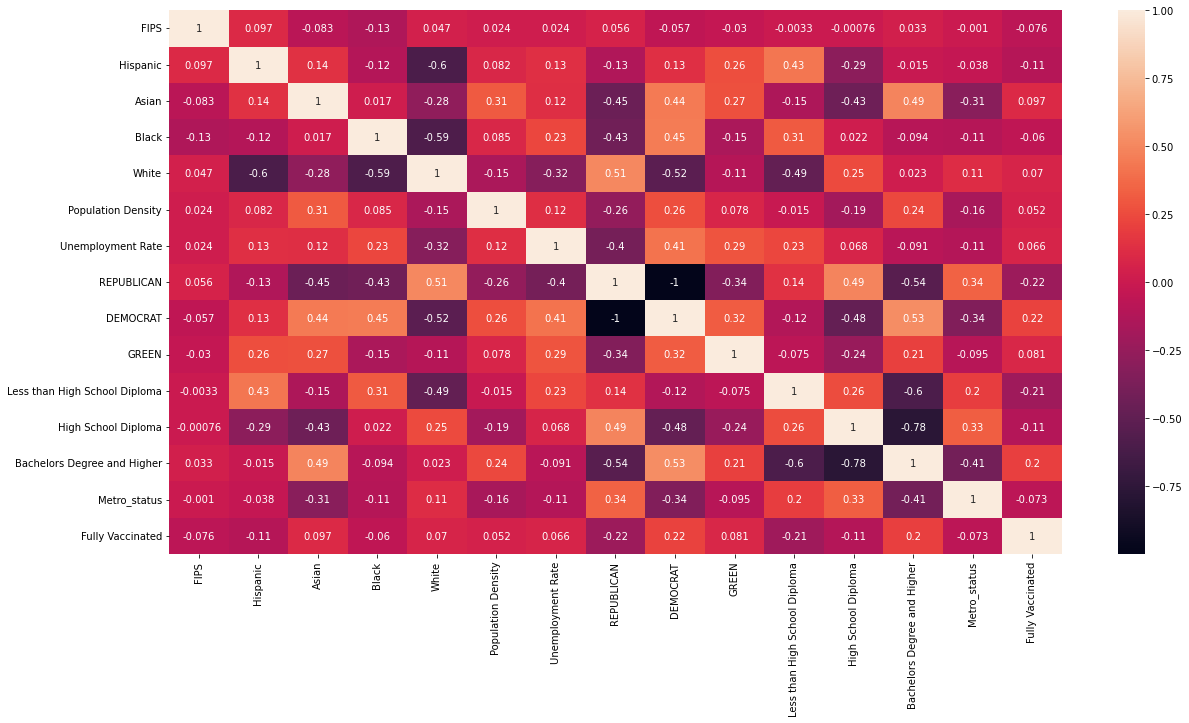

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
c= corrm.corr()
c
plt.figure(figsize=(20,10))
sns.heatmap(c, annot =True)

##Prediction and model fitting

In [96]:
modell=model_data.copy(deep=True)

In [97]:
model_data.drop(model_data.index[(model_data['Days']== 0) & (model_data['VAC_PER']!=80)], inplace = True)

In [98]:
model_data

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status,VAC_PER,Days
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1383,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1,5.0,48.0
1,1123,"Tallapoosa County, Alabama",ALABAMA,0.1383,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1,10.0,72.0
2,1123,"Tallapoosa County, Alabama",ALABAMA,0.1383,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1,15.0,98.0
3,1123,"Tallapoosa County, Alabama",ALABAMA,0.1383,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1,20.0,129.0
4,1123,"Tallapoosa County, Alabama",ALABAMA,0.1383,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1,25.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50263,55099,"Price County, Wisconsin",WISCONSIN,0.0906,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,34.886429,16.482237,2022-01-06,Price County,WI,59.7,63.7,1,40.0,115.0
50264,55099,"Price County, Wisconsin",WISCONSIN,0.0906,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,34.886429,16.482237,2022-01-06,Price County,WI,59.7,63.7,1,45.0,137.0
50265,55099,"Price County, Wisconsin",WISCONSIN,0.0906,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,34.886429,16.482237,2022-01-06,Price County,WI,59.7,63.7,1,50.0,204.0
50266,55099,"Price County, Wisconsin",WISCONSIN,0.0906,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,34.886429,16.482237,2022-01-06,Price County,WI,59.7,63.7,1,55.0,256.0


In [99]:

def data(i,j):
  LRdata = model_data[['FIPS','SVI','HESITANT_S','Asian','Hispanic','Black','REPUBLICAN', 'DEMOCRAT','GREEN', 'LHSD' ,'HSD', 'BDH','Unemp_rate','Series_Complete_Pop_Pct','Administered_Dose1_Pop_Pct','Metro_status','VAC_PER','Days']].copy(deep=True)
  # LRdata.drop(LRdata.index[LRdata['Series_Complete_Pop_Pct'] < 5], inplace = True)
  LRtrain = LRdata[(LRdata['VAC_PER']<=i) & (LRdata['Series_Complete_Pop_Pct'] >= 5)].copy(deep=True)
  # _ = LRtrain.pop('VAC_PER')  
  LRtest = LRdata[(LRdata['VAC_PER']==j)].copy(deep=True)
  # _ = LRtest.pop('VAC_PER') 
# LRdata[(LRdata['VAC_PER']==10.0) & (LRdata['Days']==0)]

  yLR = LRtrain.pop('Days')
  _ = LRtrain.pop('Series_Complete_Pop_Pct')
  _ = LRtrain.pop('FIPS')
  _ = LRtest.pop('FIPS')
  median = LRtrain['REPUBLICAN'].median()
  LRtrain['REPUBLICAN'].fillna(median, inplace =True)
  median = LRtrain['DEMOCRAT'].median()
  LRtrain['DEMOCRAT'].fillna(median, inplace =True)
  median = LRtrain['GREEN'].median()
  LRtrain['GREEN'].fillna(median, inplace =True)
  median = LRtrain['LHSD'].median()
  LRtrain['LHSD'].fillna(median, inplace =True)
  median = LRtrain['HSD'].median()
  LRtrain['HSD'].fillna(median, inplace =True)
  median = LRtrain['BDH'].median()
  LRtrain['BDH'].fillna(median, inplace =True)
  median = LRtrain['SVI'].median()
  LRtrain['SVI'].fillna(median, inplace =True)
  LRtrain['Asian']= LRtrain['Asian'].apply(lambda x: float(x))
  LRtrain['Black']= LRtrain['Black'].apply(lambda x: float(x))
  LRtrain['Hispanic']= LRtrain['Hispanic'].apply(lambda x: float(x))
  LRtrain['SVI']= LRtrain['SVI'].apply(lambda x: float(x))
  LRtest['Asian']= LRtest['Asian'].apply(lambda x: float(x))
  LRtest['Black']= LRtest['Black'].apply(lambda x: float(x))
  LRtest['Hispanic']= LRtest['Hispanic'].apply(lambda x: float(x))
  LRtest['SVI']= LRtest['SVI'].apply(lambda x: float(x))
  median = LRtest['REPUBLICAN'].median()
  LRtest['REPUBLICAN'].fillna(median, inplace =True)
  median = LRtest['DEMOCRAT'].median()
  LRtest['DEMOCRAT'].fillna(median, inplace =True)
  median = LRtest['GREEN'].median()
  LRtest['GREEN'].fillna(median, inplace =True)
  median = LRtest['LHSD'].median()
  LRtest['LHSD'].fillna(median, inplace =True)
  median = LRtest['HSD'].median()
  LRtest['HSD'].fillna(median, inplace =True)
  median = LRtest['BDH'].median()
  LRtest['BDH'].fillna(median, inplace =True)
  median = LRtest['SVI'].median()
  LRtest['SVI'].fillna(median, inplace =True)
  _ = LRtest.pop('Series_Complete_Pop_Pct')
  # _ = LRtest.pop('VAC_PER') 
  yLRt = LRtest.pop('Days')
  return LRtrain, LRtest, yLR, yLRt

In [100]:
accuracy={}
k=5
l=10

from sklearn.metrics import mean_squared_error
for i in range(14):
  LRtrain, LRtest, yLR, yLRt = data(k,l)
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  model0 = lr.fit(LRtrain, yLR)
  from sklearn.ensemble import RandomForestRegressor
  rfr = RandomForestRegressor()
  model1 = rfr.fit(LRtrain, yLR)
  from xgboost import XGBRegressor
  xgb = XGBRegressor(objective ='reg:squarederror')
  model2 = xgb.fit(LRtrain, yLR)
  from sklearn.tree import DecisionTreeRegressor
  dtr = DecisionTreeRegressor()
  model3 =dtr.fit(LRtrain, yLR)
  LR = model0.score(LRtest, yLRt)
  RFR = model1.score(LRtest, yLRt)
  XGB = model2.score(LRtest, yLRt)
  DTR = model3.score(LRtest, yLRt)
  def RMS(a,b):
    RMSE = mean_squared_error(a, b, squared=False)
    RMPSE = np.sqrt((np.mean(np.square(a-b)/a)))
    return RMSE, RMPSE
  pred=[model0.predict(LRtest),model1.predict(LRtest),model2.predict(LRtest),model3.predict(LRtest)]
  for item in pred:
    print(RMS(yLRt, item))

  print('Train Data size:',LRtrain.shape)
  print('Test Data size:',LRtest.shape)
  print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using Linear Regression. Accuracy:", LR)
  print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using XGboost. Accuracy:", XGB)
  print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using Random Forest Regressor. Accuracy:", RFR)
  print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using Decision Tree Regressor. Accuracy:", DTR)
  print('\n')
  accuracy[l]=[LR, RFR, XGB, DTR]
  k+=5
  l+=5
  

(46.70082881741673, 4.65648746883877)
(32.69212156890489, 3.234489696098397)
(32.67487379636394, 2.5507978131567106)
(32.165420509741544, 2.543256372633388)
Train Data size: (3114, 15)
Test Data size: (3124, 15)
Trained model with atleast 5 % vaccination and Prediction of 10 % vaccination using Linear Regression. Accuracy: 0.07280278469850987
Trained model with atleast 5 % vaccination and Prediction of 10 % vaccination using XGboost. Accuracy: 0.5461098272768194
Trained model with atleast 5 % vaccination and Prediction of 10 % vaccination using Random Forest Regressor. Accuracy: 0.5456305194937765
Trained model with atleast 5 % vaccination and Prediction of 10 % vaccination using Decision Tree Regressor. Accuracy: 0.5601532279828921


(50.14184741085808, 7.367054925336606)
(30.16520089443475, 2.6217727426376514)
(30.775873667772313, 2.0512845417575787)
(27.574334821624085, 2.142881521418538)
Train Data size: (6226, 15)
Test Data size: (3111, 15)
Trained model with atleast 10 % vaccinat

(70.31583158064913, 14.500014842084951)
(57.91278593404791, 3.4998058215667553)
(57.331508017922054, 3.80760412341136)
(59.1568737703888, 3.5793031704474396)
Train Data size: (27793, 15)
Test Data size: (280, 15)
Trained model with atleast 60 % vaccination and Prediction of 65 % vaccination using Linear Regression. Accuracy: 0.26437839109794936
Trained model with atleast 60 % vaccination and Prediction of 65 % vaccination using XGboost. Accuracy: 0.5109705942349861
Trained model with atleast 60 % vaccination and Prediction of 65 % vaccination using Random Forest Regressor. Accuracy: 0.5010038916491262
Trained model with atleast 60 % vaccination and Prediction of 65 % vaccination using Decision Tree Regressor. Accuracy: 0.47933465345202875


(69.00111478625408, 13.666646894699157)
(59.87959802921075, 3.693654714354026)
(60.58263821714309, 3.784913902966785)
(61.122941568726766, 3.8083584900501775)
Train Data size: (28073, 15)
Test Data size: (143, 15)
Trained model with atleast 65 % vac

In [101]:
accuracy={}
k=75
l=80
from sklearn.metrics import mean_squared_error
for i in range(1):
  LRtrain, LRtest, yLR, yLRt = data(k,l)
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  model0 = lr.fit(LRtrain, yLR)
  from sklearn.ensemble import RandomForestRegressor
  rfr = RandomForestRegressor()
  model1 = rfr.fit(LRtrain, yLR)
  from xgboost import XGBRegressor
  xgb = XGBRegressor(objective ='reg:squarederror')
  model2 = xgb.fit(LRtrain, yLR)
  from sklearn.tree import DecisionTreeRegressor
  dtr = DecisionTreeRegressor()
  model3 =dtr.fit(LRtrain, yLR)
  # LR = model0.score(LRtest, yLRt)
  # RFR = model1.score(LRtest, yLRt)
  # XGB = model2.score(LRtest, yLRt)
  # DTR = model3.score(LRtest, yLRt)
  # def RMS(a,b):
  #   RMSE = mean_squared_error(a, b, squared=False)
  #   RMPSE = np.sqrt((np.mean(np.square(a-b)/a)))
  #   return RMSE, RMPSE
  pred=[model0.predict(LRtest),model1.predict(LRtest),model2.predict(LRtest),model3.predict(LRtest)]
  # for item in pred:
  #   print(RMS(yLRt, item))

  print('Train Data size:',LRtrain.shape)
  print('Test Data size:',LRtest.shape)
  # print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using Linear Regression. Accuracy:", LR)
  # print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using XGboost. Accuracy:", XGB)
  # print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using Random Forest Regressor. Accuracy:", RFR)
  # print('Trained model with atleast',k,'% vaccination and Prediction of',l,"% vaccination using Decision Tree Regressor. Accuracy:", DTR)
  # print('\n')
  # accuracy[l]=[LR, RFR, XGB, DTR]
  k+=5
  l+=5
  

Train Data size: (28290, 15)
Test Data size: (3142, 15)


In [102]:
csv_80 = pd.DataFrame({'FIPS':list(model_data['FIPS'].unique())})
csv_80.sort_values(by = 'FIPS', inplace = True)
for i in range(4):
  csv_80['Pred'+str(i)]=pred[i]

In [103]:
import re
from datetime import timedelta, date, datetime
times= time.copy(deep=True)
def date_conv(date, a):
  EndDate = date+timedelta(days=a)
  Date = datetime.strftime(EndDate, "%b-%d-%Y")
  return Date
for i in range(4):
  csv_80['80_'+str(i)] = ''
  for j in range(len(csv_80['Pred'+str(i)])):
    date = times[(times['Series_Complete_Pop_Pct']==0) & (times['FIPS']==csv_80.iloc[j]['FIPS'])]['Date'].max()
    a= csv_80['Pred'+str(i)][j]
    csv_80['80_'+str(i)][j] = date_conv(date, int(a))

/var/folders/6f/wrlgw0cs2zl31x120hx18c3c0000gn/T/ipykernel_60192/1770171928.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_80['80_'+str(i)][j] = date_conv(date, int(a))


In [104]:
a = model_data[model_data['VAC_PER']==80]['Days']
csv_80['Actual']=''
i=0
times= time.copy(deep=True)
for j in a:
    if j!=0:
      date = times[(times['Series_Complete_Pop_Pct']==0) & (times['FIPS']==csv_80.iloc[i]['FIPS'])]['Date'].max()
      csv_80['Actual'][i]= date_conv(date, int(j))
      i+=1
    else:
      i+=1

/var/folders/6f/wrlgw0cs2zl31x120hx18c3c0000gn/T/ipykernel_60192/472688003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_80['Actual'][i]= date_conv(date, int(j))


In [105]:
csv_80

,FIPS,Pred0,Pred1,Pred2,Pred3,80_0,80_1,80_2,80_3,Actual
277,1001,398.570788,326.67,438.232330,326.0,May-05-2022,Feb-22-2022,Jun-14-2022,Feb-22-2022,
285,1003,406.953537,316.34,442.335571,326.0,Apr-19-2022,Jan-19-2022,May-25-2022,Jan-29-2022,
312,1005,403.444871,279.79,339.519684,312.0,Feb-14-2022,Oct-13-2021,Dec-12-2021,Nov-15-2021,
341,1007,384.285593,323.83,362.800842,341.0,Jan-27-2022,Nov-27-2021,Jan-05-2022,Dec-15-2021,
378,1009,417.287800,328.16,456.161224,343.0,Feb-27-2022,Nov-30-2021,Apr-07-2022,Dec-15-2021,
...,...,...,...,...,...,...,...,...,...,...
3084,56037,387.938753,337.64,358.208405,356.0,Feb-11-2022,Dec-23-2021,Jan-13-2022,Jan-11-2022,
3051,56039,351.949392,310.07,314.154114,302.0,Dec-25-2021,Nov-14-2021,Nov-18-2021,Nov-06-2021,Oct-14-2021
3016,56041,351.900590,315.41,368.484375,289.0,Jan-07-2022,Dec-02-2021,Jan-24-2022,Nov-06-2021,
3106,56043,382.574996,322.47,342.925537,342.0,Feb-01-2022,Dec-03-2021,Dec-23-2021,Dec-23-2021,


In [106]:
csv_80.to_csv('CSV_80.csv', index= False)

<AxesSubplot:>

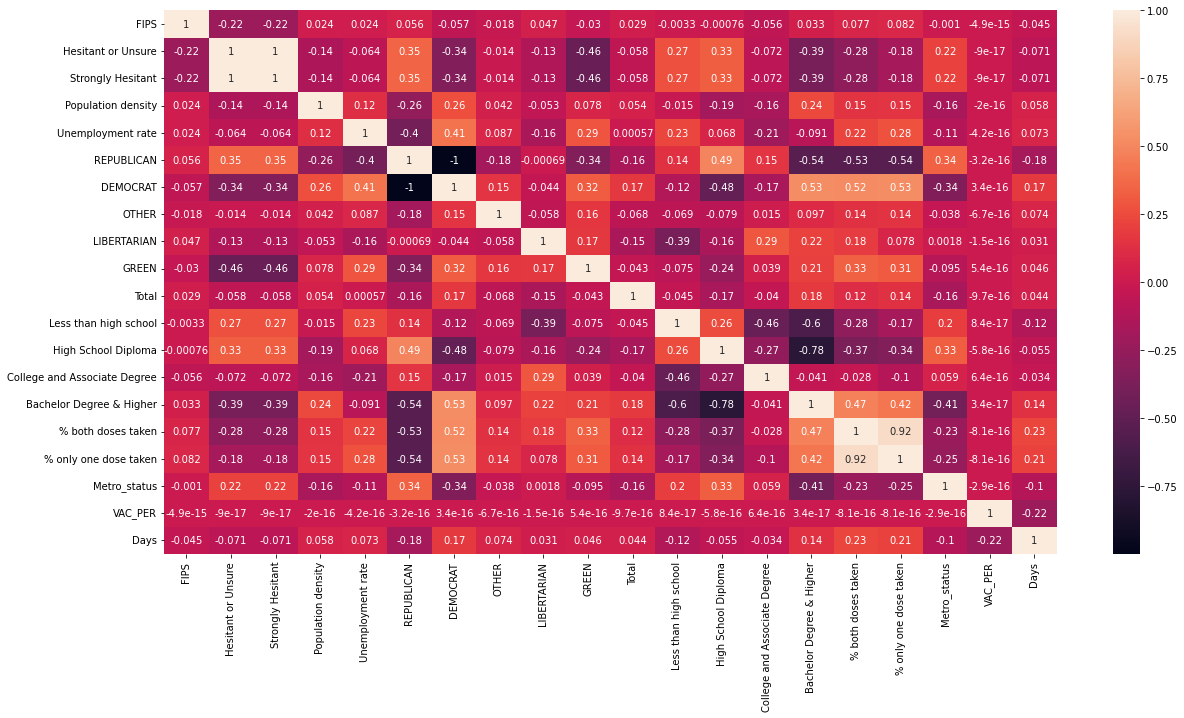

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# vac.rename({'fips':'FIPS','date':'Date','recip_county':'Recip_County', 'recip_state': 'Recip_State', 'series_complete_pop_pct':'Series_Complete_Pop_Pct','administered_dose1_pop_pct':'Administered_Dose1_Pop_Pct', 'metro_status': 'Metro_status'}, inplace =True, axis = 1)

# corr.rename({'POPDEN':'Population density','Unemp_rate':'Unemployment rate','AIAN':'American Indian/ Alaskan Native','NHPI':'Native Hawaiian/ Pacific Islander','LHSD':'Less than high school','HSD':'High School Diploma','CAD':'College and Associate Degree','BDH':'Bachelor Degree Holder','Series_Complete_Pop_Pct':'% both doses taken','Administered_Dose1_Pop_Pct':'% only one dose taken'})



plt.figure(figsize = (20,10))

correlate = modell.copy(deep=True)
correlate.rename({'HESITANT_UNS':'Hesitant or Unsure','HESITANT_S':'Strongly Hesitant','POPDEN':'Population density','Unemp_rate':'Unemployment rate','AIAN':'American Indian/ Alaskan Native','NHPI':'Native Hawaiian/ Pacific Islander','LHSD':'Less than high school','HSD':'High School Diploma','CAD':'College and Associate Degree','BDH':'Bachelor Degree & Higher','Series_Complete_Pop_Pct':'% both doses taken','Administered_Dose1_Pop_Pct':'% only one dose taken'}, inplace=True, axis=1)
j= correlate.corr()
sns.heatmap(j, annot=True)

##PHASE 3 ANALYSIS


In [108]:
time

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,LHSD,HSD,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-06,Tallapoosa County,AL,37.2,44.0,1
1,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-05,Tallapoosa County,AL,37.2,44.0,1
2,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-04,Tallapoosa County,AL,37.2,44.0,1
3,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-03,Tallapoosa County,AL,37.2,44.0,1
4,1123,"Tallapoosa County, Alabama",ALABAMA,0.24,0.1383,0.89,0.0242,0.0022,0.0036,0.2697,...,19.346287,32.706596,29.504309,18.442808,2022-01-02,Tallapoosa County,AL,37.1,43.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225375,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-17,Price County,WI,0.0,0.0,1
1225376,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-16,Price County,WI,0.0,0.0,1
1225377,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-15,Price County,WI,0.0,0.0,1
1225378,55099,"Price County, Wisconsin",WISCONSIN,0.2039,0.0906,0.16,0.0177,0.0096,0.006,0.0083,...,8.221704,40.409630,34.886429,16.482237,2020-12-14,Price County,WI,0.0,0.0,1


In [109]:
time[(time['Date']=='2021-11-15') & (time['Series_Complete_Pop_Pct']==time['Series_Complete_Pop_Pct'].max()) & (time['Series_Complete_Pop_Pct']>=2)]

,FIPS,county_name,State_x,HESITANT_UNS,HESITANT_S,SVI,Hispanic,AIAN,Asian,Black,...,LHSD,HSD,CAD,BDH,Date,Recip_County,Recip_State,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,Metro_status


In [110]:
largestM = time[(time['Date']=='2021-11-20') &  (time['Series_Complete_Pop_Pct']>=2) & (time['Metro_status']==0)]['Series_Complete_Pop_Pct'].nlargest(5)
smallestM = time[(time['Date']=='2021-11-20') &  (time['Series_Complete_Pop_Pct']>=2) & (time['Metro_status']==0)]['Series_Complete_Pop_Pct'].nsmallest(5)
largestNM = time[(time['Date']=='2021-11-20') &  (time['Series_Complete_Pop_Pct']>=2) & (time['Metro_status']==1)]['Series_Complete_Pop_Pct'].nlargest(5)
smallestNM = time[(time['Date']=='2021-11-20') &  (time['Series_Complete_Pop_Pct']>=2) & (time['Metro_status']==1)]['Series_Complete_Pop_Pct'].nsmallest(5)

In [111]:
for i in range(len(largestM)):
  a=time.iloc[largestM.index[i]]
  print(a[['FIPS','County', 'Series_Complete_Pop_Pct','Metro_status']])

for i in range(len(smallestM)):
  a = time.iloc[smallestM.index[i]]
  print(a[['FIPS','County', 'Series_Complete_Pop_Pct','Metro_status']])

for i in range(len(largestNM)):
  a=time.iloc[largestNM.index[i]]
  print(a[['FIPS','County', 'Series_Complete_Pop_Pct','Metro_status']])

for i in range(len(smallestNM)):
  a = time.iloc[smallestNM.index[i]]
  print(a[['FIPS','County', 'Series_Complete_Pop_Pct','Metro_status']])

FIPS                                      13053
County                     Chattahoochee County
Series_Complete_Pop_Pct                    99.9
Metro_status                                  0
Name: 222737, dtype: object
FIPS                                 51740
County                     Portsmouth city
Series_Complete_Pop_Pct               84.9
Metro_status                             0
Name: 1146647, dtype: object
FIPS                                       22125
County                     West Feliciana Parish
Series_Complete_Pop_Pct                     83.0
Metro_status                                   0
Name: 500417, dtype: object
FIPS                               6041
County                     Marin County
Series_Complete_Pop_Pct            79.1
Metro_status                          0
Name: 161117, dtype: object
FIPS                                   23005
County                     Cumberland County
Series_Complete_Pop_Pct                 78.9
Metro_status                    

In [112]:
# a=time.iloc[largestM.index[0]]
# print(a)
# a=time.iloc[smallestM.index[0]]
# print(a)
# a=time.iloc[largestNM.index[0]]
# print(a)
# a=time.iloc[smallestNM.index[0]]
# print(a)

In [113]:
time[(time['Date']=='2021-12-01')&(time['Series_Complete_Pop_Pct']>=50)& (time['Series_Complete_Pop_Pct']<=60)]['Series_Complete_Pop_Pct'].nlargest(20)
# time[time['Series_Complete_Pop_Pct'].max()>=50]['Series_Complete_Pop_Pct'].nlargest(100)
time.iloc[602436]

FIPS                                                28013
county_name                   Calhoun County, Mississippi
State_x                                       MISSISSIPPI
HESITANT_UNS                                       0.2802
HESITANT_S                                         0.1194
SVI                                                  0.96
Hispanic                                           0.0602
AIAN                                                    0
Asian                                              0.0023
Black                                              0.2737
NHPI                                                    0
White                                              0.6449
County_x                                   Calhoun County
State_y                                       Mississippi
POPDEN                                           9.591117
County_y                               Calhoun County, MS
Unemp_rate                                            8.1
REPUBLICAN    

##ARIMA ANALYSIS FOR 5 COUNTIES

In [114]:
brevard = time[time['FIPS']==12009].copy(deep=True)
san_b = time[time['FIPS']==6071].copy(deep=True)
bethel = time[time['FIPS']==2050].copy(deep=True)
dewey = time[time['FIPS']==30063].copy(deep=True)
marshall = time[time['FIPS']==19127].copy(deep=True)

anp = [brevard, san_b, marshall, dewey, marshall]

In [115]:
for i in range((len(anp))):
  daa = anp[i]
  daa.sort_values(by='Date',ascending=True, inplace=True)
  anp[i] = daa

<AxesSubplot:xlabel='Date'>

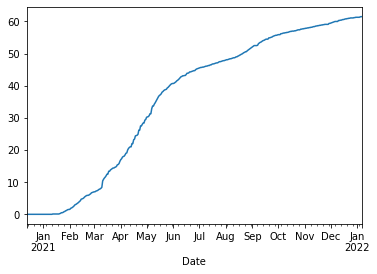

In [116]:
brevard.set_index('Date',inplace=True)
brevard['Series_Complete_Pop_Pct'].plot()

<AxesSubplot:xlabel='Date'>

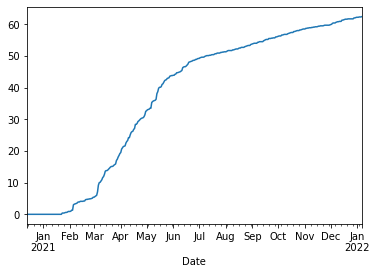

In [117]:

marshall.set_index('Date',inplace=True)
marshall['Series_Complete_Pop_Pct'].plot()

<AxesSubplot:xlabel='Date'>

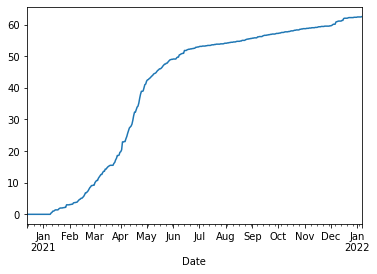

In [118]:

dewey.set_index('Date',inplace=True)
dewey['Series_Complete_Pop_Pct'].plot()

<AxesSubplot:xlabel='Date'>

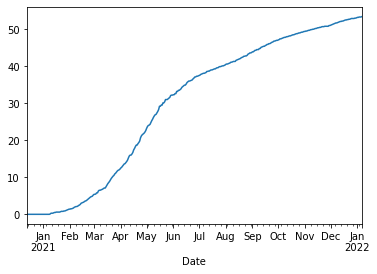

In [119]:
san_b.set_index('Date',inplace=True)
san_b['Series_Complete_Pop_Pct'].plot()

<AxesSubplot:xlabel='Date'>

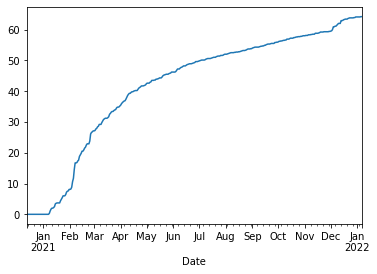

In [120]:
bethel.set_index('Date',inplace=True)
bethel['Series_Complete_Pop_Pct'].plot()

In [121]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
      dftest = adfuller(dataset['Series_Complete_Pop_Pct'], autolag = 'AIC')
      print("1. ADF : ",dftest[0])
      print("2. P-Value : ", dftest[1])
      # print("3. Num Of Lags : ", dftest[2])
      # print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
      # print("5. Critical Values :")
      # for key, val in dftest[4].items():
        # print("\t",key, ": ", val)
      return dftest[1]

for i in range(len(anp)):
  m_data = anp[i]
  ad_test(m_data)

1. ADF :  -2.035961151437496
2. P-Value :  0.2710312934345117
1. ADF :  -2.359286140043121
2. P-Value :  0.1535587475191993
1. ADF :  -1.8324282255203828
2. P-Value :  0.36448493080938904
1. ADF :  -2.128383777270542
2. P-Value :  0.2332555412393702
1. ADF :  -1.8324282255203828
2. P-Value :  0.36448493080938904


In [122]:
from pmdarima import auto_arima
sf= []
def autoarima(dataset):
  stepwise_fit = auto_arima(dataset['Series_Complete_Pop_Pct'], trace=True, suppress_warnings=True)
  sf.append(stepwise_fit.order)

for i in range(len(anp)):
  m_data = anp[i]
  autoarima(m_data)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-171.905, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=144.039, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-69.907, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-154.267, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-172.910, Time=0.24 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-166.370, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-170.445, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-172.342, Time=0.33 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-172.254, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-173.742, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-102.387, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-172.089, Time=0.30 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-116.162, Time=0.10 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-169.746, Time=0.29 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept  

In [123]:
sf

[(2, 2, 1), (0, 2, 1), (1, 2, 1), (5, 2, 5), (1, 2, 1)]

In [124]:
tr =[]
te =[]
def test_train(dataset):
  
  train=dataset.iloc[:-100]
  
  tr.append(train)
  test=dataset.iloc[-100:]

  te.append(test)
for i in range(len(anp)):
  m_data = anp[i]
  test_train(m_data)

/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ad_demon/opt/anaconda3/lib/python3.9/site-packages/st

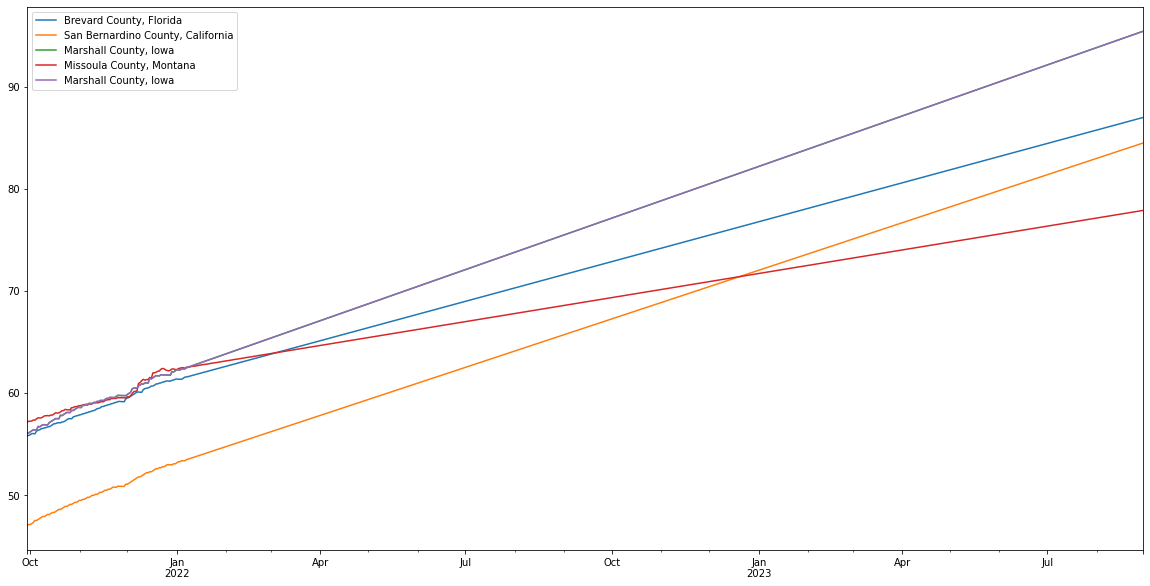

In [125]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(20,10))
mod=[]
pa = []
def modfit(dataset, x):
  model=ARIMA(dataset['Series_Complete_Pop_Pct'],order=x)
  model=model.fit()
  mod.append(model)
  return model
  # model.summary()

for i in range(len(anp)):
  m_data = anp[i]
  start=len(tr[i])
  end=len(tr[i])+len(te[i])+600
  pred=modfit(m_data, sf[i]).predict(start=start,end=end,typ='levels').rename(str(m_data['county_name'].unique()[0]))
  pred.plot(legend=True)
  pa.append(pred)

In [126]:
# future_dates=model.make_future_dataframe(periods=100)

In [127]:
pred[pred>=80].index.min()

Timestamp('2022-11-23 00:00:00', freq='D')

In [128]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def datee(p,t):
  dat = p[p>=80].index.min()
  fips = anp[i]['FIPS'].unique()
  county = anp[i]['county_name'].unique()
  print(dat, fips, county)

for i in range(len(anp)):
  datee(pa[i], te[i])

2023-03-19 00:00:00 [12009] ['Brevard County, Florida']
2023-06-05 00:00:00 [6071] ['San Bernardino County, California']
2022-11-23 00:00:00 [19127] ['Marshall County, Iowa']
NaT [30063] ['Missoula County, Montana']
2022-11-23 00:00:00 [19127] ['Marshall County, Iowa']


In [129]:
anp[0].columns

Index(['FIPS', 'county_name', 'State_x', 'HESITANT_UNS', 'HESITANT_S', 'SVI',
       'Hispanic', 'AIAN', 'Asian', 'Black', 'NHPI', 'White', 'County_x',
       'State_y', 'POPDEN', 'County_y', 'Unemp_rate', 'REPUBLICAN', 'DEMOCRAT',
       'OTHER', 'LIBERTARIAN', 'GREEN', 'Total', 'State', 'County', 'LHSD',
       'HSD', 'CAD', 'BDH', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Administered_Dose1_Pop_Pct',
       'Metro_status'],
      dtype='object')

##Prophet

In [130]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [138]:
pip install fbprophet

     |████████████████████████████████| 64 kB 2.4 MB/s eta 0:00:011
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=662056 sha256=cc65cb921eb4c550fd1aba4d7db7d5d09685e1b5dbfd40154560c3506f81a4da
  Stored in directory: /Users/ad_demon/Library/Caches/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 0.9.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.42784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1128.95      0.013966       1335.72           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1222.49    0.00616065       823.696           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1254.4    0.00280996       704.453           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1263.76   0.000606474       206.866      0.7302      0.7302      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1275.65    0.00164696       1318.54           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Brevard County, Florida
Initial log joint probability = -3.36821
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1296.05     0.0335421       5610.76           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1358.75    0.00733488       5396.73      0.3489           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1390.79    0.00113973       2834.64      0.3121      0.3121      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1422.17    0.00497495       3494.74           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1453.48    0.00383078        1105.6           1           1      567   
    Iter      log prob        ||dx||    

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


San Bernardino County, California
Initial log joint probability = -4.29329
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1083.34    0.00401034       2983.25      0.3261      0.6834      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1117.48    0.00922751       243.267           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1147.01   0.000396616       177.014           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1154.61    0.00596612       340.552           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1159.22   0.000232838       406.028      0.3592           1      594   
    Iter      log prob        

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Marshall County, Iowa
Initial log joint probability = -5.69966
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       999.015      0.058775       1257.66           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1112.43   0.000851633       1035.52      0.5494      0.5494      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1181.05    0.00586496       1191.31      0.7066      0.7066      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1205.65      0.011092       1938.63      0.8445      0.8445      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1223.76    0.00528102        1253.2      0.4863      0.4863      575   
    Iter      log prob        ||dx||      

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Missoula County, Montana
Initial log joint probability = -4.29329
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1083.34    0.00401034       2983.25      0.3261      0.6834      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1117.48    0.00922751       243.267           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1147.01   0.000396616       177.014           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1154.61    0.00596612       340.552           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1159.22   0.000232838       406.028      0.3592           1      594   
    Iter      log prob        ||dx||   

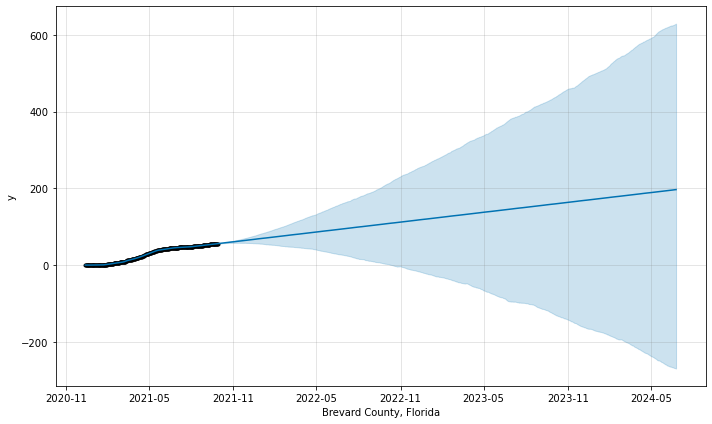

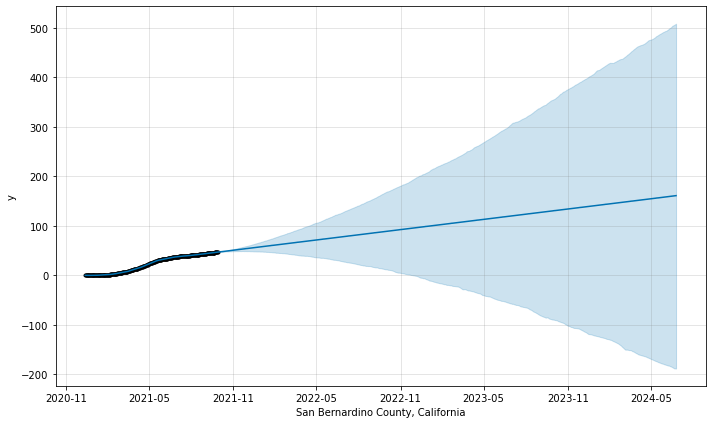

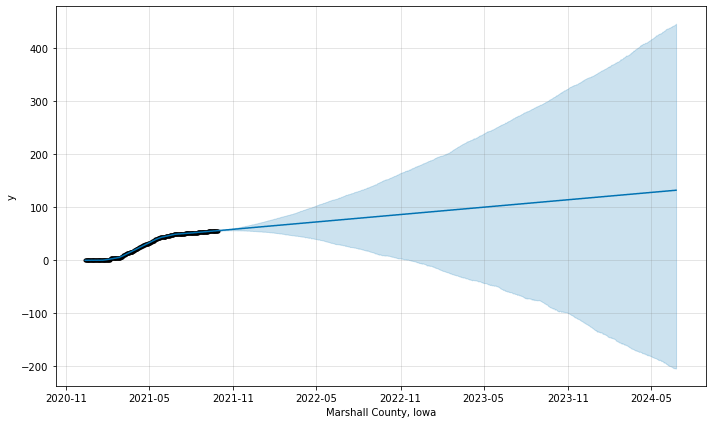

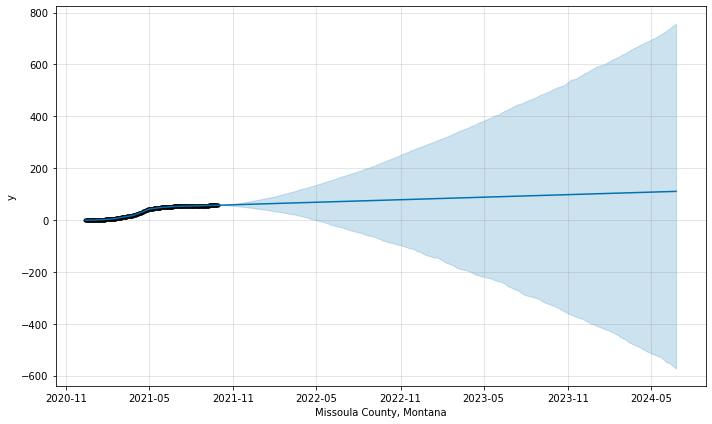

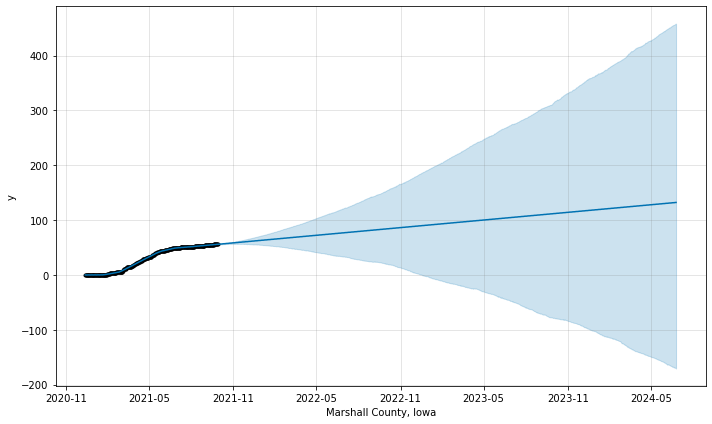

In [140]:
import fbprophet
from fbprophet import Prophet
# Initialize the Model
phd = []
def proph(dataset):
  model=Prophet()
  pny = dataset.copy(deep=True)
  pny.reset_index(inplace=True)
  pny.rename({'Date':'ds', 'Series_Complete_Pop_Pct':'y'}, axis = 1, inplace=True)
  testd = pny[-100:]
  pny=pny[:-100]
  model.fit(pny)
  future_dates=model.make_future_dataframe(periods=1000)
  prediction=model.predict(future_dates)
  dateee= prediction[prediction['yhat']>=80]['ds'].min()
  phd.append(dateee)
  print(prediction[prediction['yhat']>=80]['ds'].min())
  prediction=model.predict(future_dates)
  print(m_data['county_name'].unique()[0])
  model.plot(prediction, xlabel=m_data['county_name'].unique()[0])
  # testd.set_index('ds', inplace=True)
  # dataset.plot(legend=True)
for i in range(len(anp)):
  m_data = anp[i]
  proph(m_data)

In [141]:
i=0
for item in phd:
  print(anp[i]['county_name'].unique()[0],item)
  i+=1


Brevard County, Florida 2022-03-19 00:00:00
San Bernardino County, California 2022-07-16 00:00:00
Marshall County, Iowa 2022-08-12 00:00:00
Missoula County, Montana 2022-12-01 00:00:00
Marshall County, Iowa 2022-08-12 00:00:00
